<a href="https://colab.research.google.com/github/Haarish-dev/Analysing-Big-Bang-Theory/blob/main/BBT_Analysis_Dialogues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
pd.options.display.max_colwidth = 80

In [88]:
df = pd.read_csv("dataset.csv")
df['Title'] = df['Title'].str.replace('"','')
df.rename(columns = {"No. inseason" : "episode","U.S. viewers(millions)" : "Viewership"},inplace=True)
df.drop(columns=['No.overall','Unnamed: 0'],inplace=True)

In [89]:
df.head()

,episode,Title,Directed by,Written by,Original air date,Prod.code,Viewership,Season
0,1,Pilot,James Burrows,Chuck Lorre & Bill Prady,2007-09-24,276023,9.52,1
1,2,The Big Bran Hypothesis,Mark Cendrowski,Story by : Chuck Lorre & Bill PradyTeleplay by : Robert Cohen & Dave Goetsch,2007-10-01,3T6601,8.58,1
2,3,The Fuzzy Boots Corollary,Mark Cendrowski,Story by : Chuck LorreTeleplay by : Bill Prady & Steven Molaro,2007-10-08,3T6602,8.36,1
3,4,The Luminous Fish Effect,Mark Cendrowski,Story by : Chuck Lorre & Bill PradyTeleplay by : David Litt & Lee Aronsohn,2007-10-15,3T6603,8.15,1
4,5,The Hamburger Postulate,Andrew D. Weyman,Story by : Jennifer GlickmanTeleplay by : Dave Goetsch & Steven Molaro,2007-10-22,3T6604,8.81,1


In [90]:
df1 = pd.read_csv("1_10_seasons.csv")
df1['Season'] = df1['episode_name'].str.extract(r'Series (\d+)').astype('int')
df1['episode'] = df1['episode_name'].str.extract(r'Episode (\d+)').astype('int')

In [91]:
df1.head()

,Unnamed: 0,episode_name,person,dialog,Season,episode
0,0,Series 01 Episode 01 – Pilot Episode,Scene,A corridor at a sperm bank.,1,1
1,1,Series 01 Episode 01 – Pilot Episode,Sheldon,So if a photon is directed through a plane with two slits in it and either ...,1,1
2,2,Series 01 Episode 01 – Pilot Episode,Leonard,"Agreed, what’s your point?",1,1
3,3,Series 01 Episode 01 – Pilot Episode,Sheldon,"There’s no point, I just think it’s a good idea for a tee-shirt.",1,1
4,4,Series 01 Episode 01 – Pilot Episode,Leonard,Excuse me?,1,1


In [92]:
df2 = pd.merge(df1, df, on=['Season','episode'], how='inner')
df2.drop(columns = ['episode_name','Directed by','Written by','Original air date','Prod.code','Viewership','Unnamed: 0'],inplace=True)
df2.head()

,person,dialog,Season,episode,Title
0,Scene,A corridor at a sperm bank.,1,1,Pilot
1,Sheldon,So if a photon is directed through a plane with two slits in it and either ...,1,1,Pilot
2,Leonard,"Agreed, what’s your point?",1,1,Pilot
3,Sheldon,"There’s no point, I just think it’s a good idea for a tee-shirt.",1,1,Pilot
4,Leonard,Excuse me?,1,1,Pilot


##ANALYSING DIALOGUES

In [93]:
df2.dropna(inplace=True)
df2.reset_index(inplace=True,drop=True)

In [94]:
df2.head()

,person,dialog,Season,episode,Title
0,Scene,A corridor at a sperm bank.,1,1,Pilot
1,Sheldon,So if a photon is directed through a plane with two slits in it and either ...,1,1,Pilot
2,Leonard,"Agreed, what’s your point?",1,1,Pilot
3,Sheldon,"There’s no point, I just think it’s a good idea for a tee-shirt.",1,1,Pilot
4,Leonard,Excuse me?,1,1,Pilot


In [95]:
df2 = df2[df2['person'] != 'Scene']

In [96]:
df2.reset_index(inplace=True,drop=True)

In [97]:
d = pd.DataFrame(df2['person'].value_counts().reset_index().values, columns=['person','Number of Dialogues']).iloc[:8,:]
d

,person,Number of Dialogues
0,Sheldon,11484
1,Leonard,9638
2,Penny,7476
3,Howard,5737
4,Raj,4576
5,Amy,3419
6,Bernadette,2636
7,Stuart,726


In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

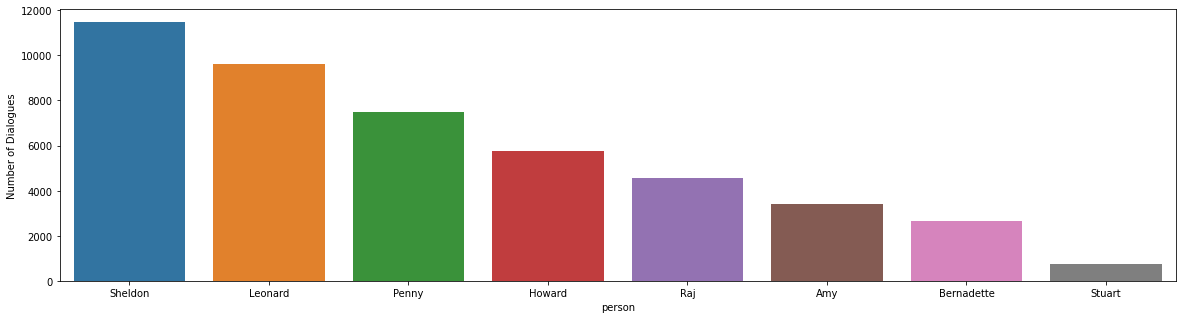

In [99]:
plt.figure(figsize=(20,5))
sns.barplot(x='person',y='Number of Dialogues',data=d)

Let's start Analysing from Season 1 so to get a idea of change from season 1

In [100]:
s1 = df2[df2['Season'] == 1]

Distribution of Dialogues

In [101]:
a = pd.DataFrame(s1['person'].value_counts().reset_index().values, columns=['person','Number of Dialogues']).iloc[:8,:]

In [102]:
a

,person,Number of Dialogues
0,Leonard,1171
1,Sheldon,1097
2,Penny,663
3,Howard,396
4,Raj,237
5,Lesley,50
6,Gablehouser,48
7,Missy,46


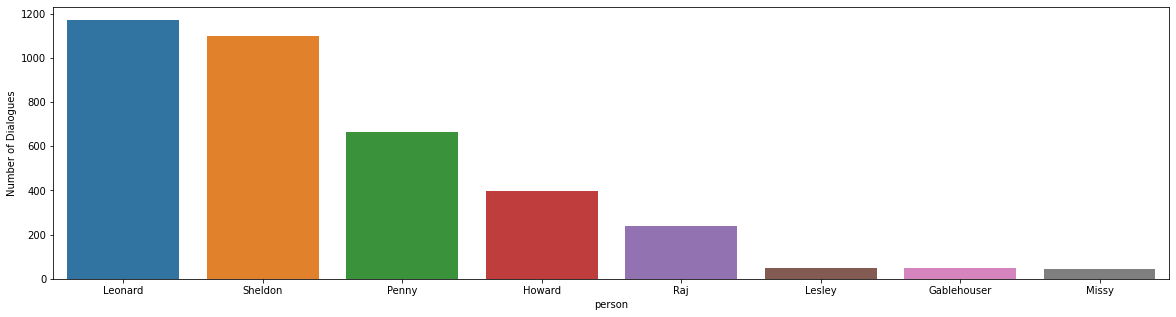

In [103]:
plt.figure(figsize=(20,5))
sns.barplot(x='person',y='Number of Dialogues',data=a)

NLP Analysis (Natural Language Processing)

In [104]:
import spacy
from spacy import displacy
import nltk
import string
import regex as re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords



import en_core_web_sm
from collections import Counter

In [105]:
added_stop_words = ['a','the', 'and', 'there', 'that', 'this', 'am', 'on',
                     'if', 'it', 'to', 'at' 'a', 'of', 'in', 'out', 'were',
                     'was', 'do', 'did', "don't","didn't", 'be', 'are', 'is',
                     'being', "it's", 'have', 'had', 's', 'j', 't', 're',
                     'all', 'an', 'one', 'what', 'just', 'at', 'with', 'just', 
                     'now', "can't", 'can', 'up', 'not', 'as', 'from', 'thing',
                     'by', 'so', 'here', 'will', 'for']

In [106]:
nlp = en_core_web_sm.load()
sp = spacy.load('en_core_web_sm') 
spacy_st = list(nlp.Defaults.stop_words)

In [107]:
nltk.download('stopwords')
nltk.download('punkt')
nltk_st = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [108]:
punc = '’”“…'.join(string.punctuation)
bbt_stopwords = ["Leonard","Penny","Sheldon","Raj","Howard","Amy","Bernadette","Ramona","Beverly","Cooper","Dr","Leslie","Priya",
                  "one","two","three","first","second","a","an",
                  "it","s","ve","got","make","go","making","going","are","re","do","don","t","give","see","take","think","isn","want",
                  "will","ll","did","didn","let","know","say","need","haven","look","may","come","making","does","doesn","said","made","put",
                  "what","how","m","r","e","u","d","USA","India",
                  "Huh","Uh","Oh","Yes","No","Well","Really","right","Okay","Yeah","So","now","Ew","Ow",
                  "good","bad","ever","never","back","much","many","something","anything","some","any","Maybe","someone","anyone","somebody","anybody",
                  "may","might","Of","course","hello","please","sure",
                  "I","You","me","your","his","her","mine","us","we","them"]
all_stopwords = added_stop_words + spacy_st + nltk_st + bbt_stopwords

In [109]:
class Clean():
    def remove_stopwords(self,txt, stopwords=all_stopwords):
        txt = [word for word in word_tokenize(txt) if not word.lower() in stopwords]
        txt = ' '.join(txt)
        return txt


    def lemmatize(self, txt):
        lemmatized = [word.lemma_ if word.lemma_ !='-PRON-' else word.text for word in sp(txt)]
        txt = ' '.join(lemmatized)
        return txt
    
    def clean_extra_spaces(self, txt):
        txt = re.sub("\s+", ' ', txt)
        txt = re.sub("\b\w\b", '', txt)
        txt = txt.strip()
        return txt  

    def remove_number(self,text):
      txt = re.sub("[0-9]",'',txt)
      return txt      
        
    def remove_punctuation(self, txt, punc=punc):
        return txt.translate(str.maketrans('', '', punc))
        
cleaning_class = Clean()

In [110]:
diologues = df2.dialog.values
diologues = list(map(cleaning_class.remove_punctuation, diologues))
diologues = list(map(cleaning_class.remove_stopwords, diologues))
diologues = list(map(cleaning_class.clean_extra_spaces, diologues))

df2['cleaned_text'] = pd.Series(diologues)

In [111]:
df2.drop(columns='dialog',inplace=True)
df2.head()

,person,Season,episode,Title,cleaned_text
0,Sheldon,1,1,Pilot,photon directed plane slits slit observed slits unobserved observed left pla...
1,Leonard,1,1,Pilot,Agreed whats point
2,Sheldon,1,1,Pilot,Theres point idea teeshirt
3,Leonard,1,1,Pilot,Excuse
4,Receptionist,1,1,Pilot,Hang


In [113]:
from wordcloud import WordCloud,ImageColorGenerator

In [121]:
text_sld = " ".join(i for i in df2[(df2['person'] == 'Sheldon') & (df2['Season'] == 1)].cleaned_text)

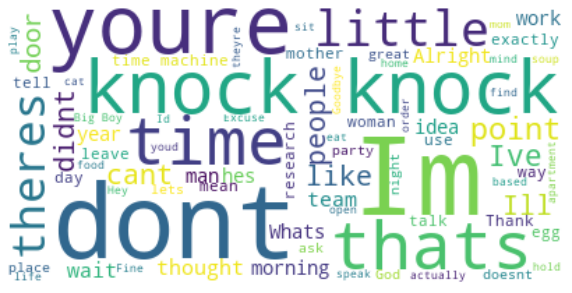

In [123]:
wordcloud = WordCloud(stopwords=all_stopwords,background_color = 'white',max_words=75).generate(text_sld)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [126]:
text_ldr = " ".join(i for i in df2[(df2['person'] == 'Leonard') & (df2['Season'] == 1)].cleaned_text)

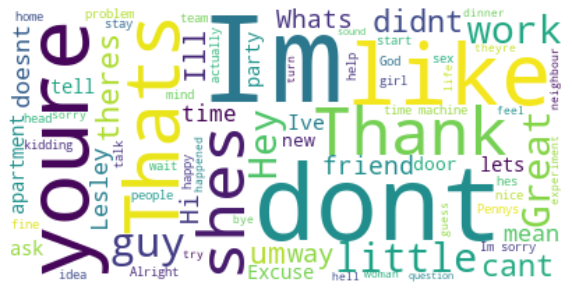

In [127]:
wordcloud = WordCloud(stopwords=all_stopwords,background_color = 'white',max_words=75).generate(text_ldr)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

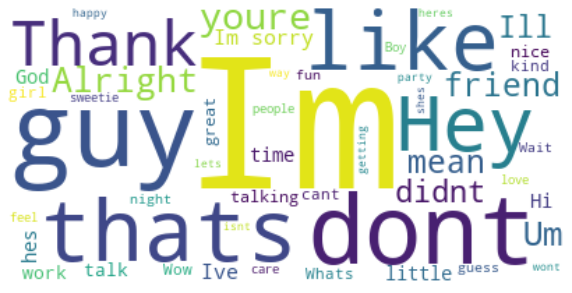

In [130]:
text_pny = " ".join(i for i in df2[(df2['person'] == 'Penny') & (df2['Season'] == 1)].cleaned_text)
wordcloud = WordCloud(stopwords=all_stopwords,background_color = 'white',max_words=50).generate(text_pny)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

The Deception Verification

The Occupation Recalibration

The Bakersfield Expedition

The Egg Salad Equivalency

The Hesitation Ramification

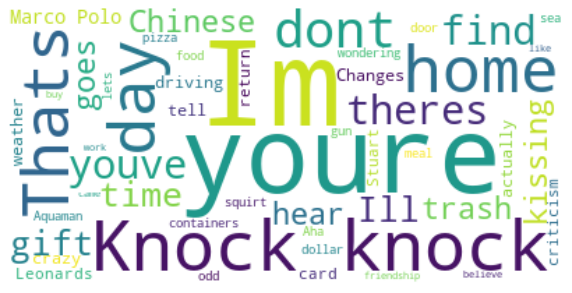

In [133]:
sheldon = " ".join(i for i in df2[(df2['person'] == 'Sheldon') & (df2['Title'] == 'The Deception Verification')].cleaned_text)
wordcloud = WordCloud(stopwords=all_stopwords,background_color = 'white',max_words=50).generate(sheldon)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

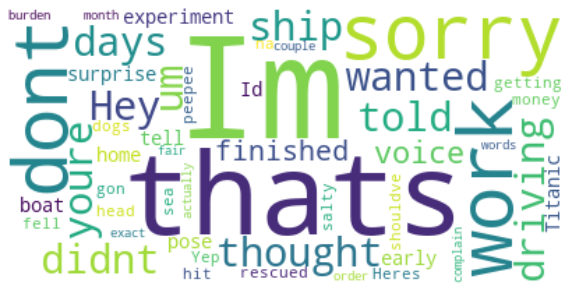

In [135]:
leonard = " ".join(i for i in df2[(df2['person'] == 'Leonard') & (df2['Title'] == 'The Deception Verification')].cleaned_text)
wordcloud = WordCloud(stopwords=all_stopwords,background_color = 'white',max_words=50).generate(leonard)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

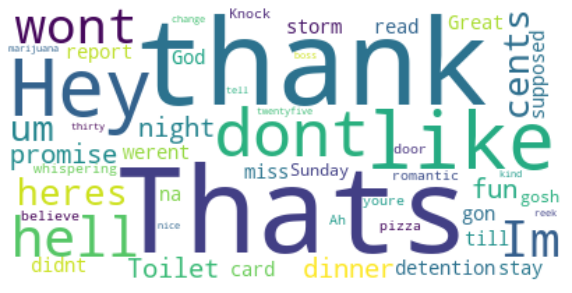

In [136]:
penny = " ".join(i for i in df2[(df2['person'] == 'Penny') & (df2['Title'] == 'The Deception Verification')].cleaned_text)
wordcloud = WordCloud(stopwords=all_stopwords,background_color = 'white',max_words=50).generate(penny)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

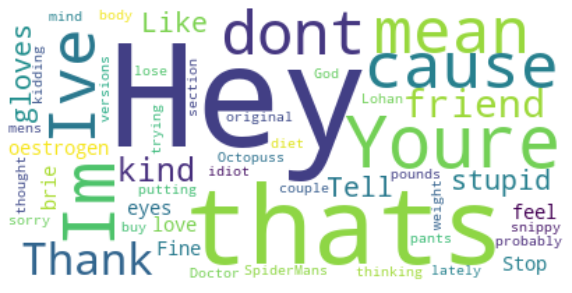

In [137]:
howard = " ".join(i for i in df2[(df2['person'] == 'Howard') & (df2['Title'] == 'The Deception Verification')].cleaned_text)
wordcloud = WordCloud(stopwords=all_stopwords,background_color = 'white',max_words=50).generate(howard)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

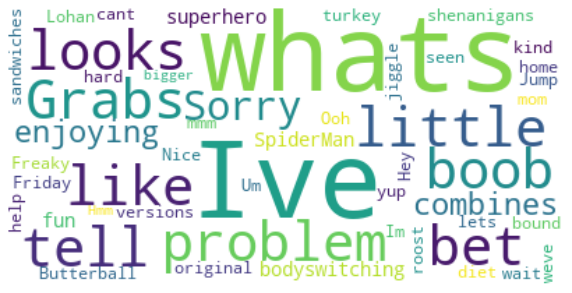

In [139]:
raj = " ".join(i for i in df2[(df2['person'] == 'Raj') & (df2['Title'] == 'The Deception Verification')].cleaned_text)
wordcloud = WordCloud(stopwords=all_stopwords,background_color = 'white',max_words=50).generate(raj)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

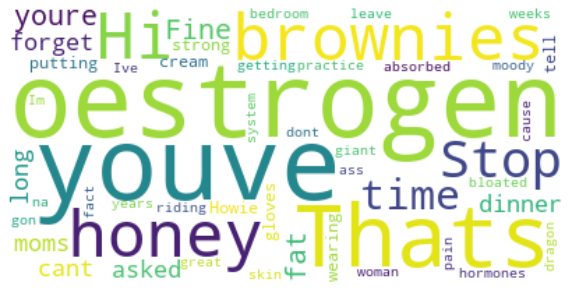

In [140]:
bernadette = " ".join(i for i in df2[(df2['person'] == 'Bernadette') & (df2['Title'] == 'The Deception Verification')].cleaned_text)
wordcloud = WordCloud(stopwords=all_stopwords,background_color = 'white',max_words=50).generate(bernadette)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

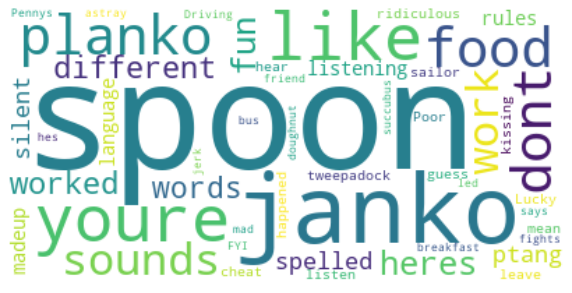

In [142]:
amy = " ".join(i for i in df2[(df2['person'] == 'Amy') & (df2['Title'] == 'The Deception Verification')].cleaned_text)
wordcloud = WordCloud(stopwords=all_stopwords,background_color = 'white',max_words=50).generate(amy)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()